## Import packages

In [1]:
# Import libraries

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

In [3]:
# Show the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Explaining the name of each column in the dataset:**

* step: represents a unit of time where 1 step equals 1 hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of recipient after the transaction
* isFraud: fraud transaction

## Exploratory Data Analysis

In [4]:
# Create a function showing some basic info of dataframe

def explore_eda(df: pd.DataFrame):
    print("========================================")
    print("Exploratory Data Analysis")
    print("========================================\n")

    # Print the shape of the DataFrame
    print("Shape of the DataFrame:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}\n")

    print("========================================\n")

    # Print the column names
    print("Columns in the DataFrame:")
    for col in df.columns:
        print(col)
    print("\n========================================\n")

    # Print the information about the DataFrame
    print("Information about the DataFrame:")
    df.info()
    print("\n========================================\n")
    
    # Print the number of null values in each column
    print("Number of null values in each column:")
    print(df.isnull().sum())
    print("\n========================================\n")

    # Print the number of unique values in each column
    print("Number of unique values in each column:")
    print(df.nunique())
    print("\n========================================\n")

    # Print the descriptive statistics for each column
    print("Descriptive statistics:")
    return df.describe()
    print("\n========================================\n")

In [5]:
explore_eda(df)

Exploratory Data Analysis

Shape of the DataFrame:
Number of rows: 6362620
Number of columns: 11


Columns in the DataFrame:
step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Number of null values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


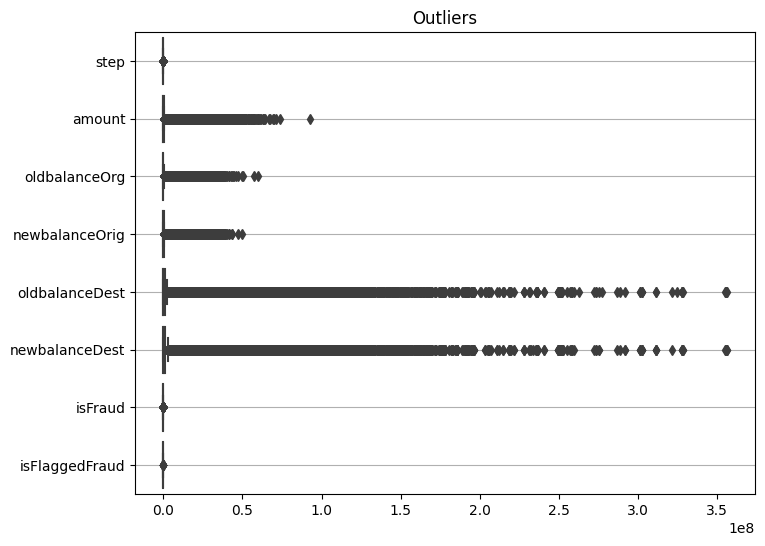

In [6]:
# Handle Outliers

plt.figure(figsize=(8, 6))
sns.boxplot(df, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

**Drop unnecessary features:**

In [7]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

## Data Visualisation 

**Distribution of Transaction Type**

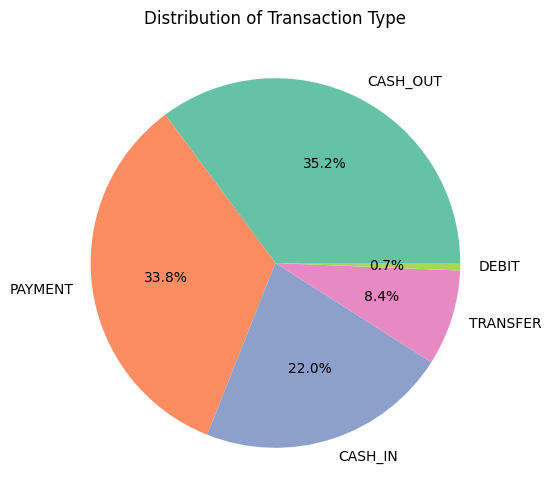

In [8]:
type = df["type"].value_counts()
keys = type.index
data = type.values

# Create a pie chart
plt.figure(figsize=(8,6))
plt.pie(data, labels = keys, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Distribution of Transaction Type")
plt.show()

**Histogram plot of each feature**

In [9]:
import ipywidgets as widgets

# Define a function to plot the selected feature
def plot_feature(feature):
    plt.figure(figsize=(10,6))
    df[feature].hist(bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.figtext(0.5, 0.01, 'Interactive Feature Plot', ha='center', va='center', fontsize=20)

# Create a dropdown widget with the dataframe's column names
dropdown = widgets.Dropdown(options=df.columns, description='Feature:')

# Use the interact function to create the widget and the plot
widgets.interact(plot_feature, feature=dropdown);

interactive(children=(Dropdown(description='Feature:', options=('step', 'type', 'amount', 'oldbalanceOrg', 'ne…

**Correlation among features**

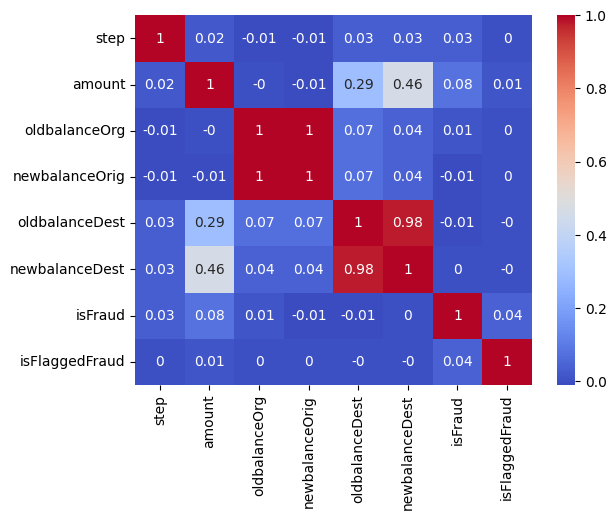

In [10]:
sns.heatmap(df.corr(numeric_only = True).round(2), annot=True, cmap='coolwarm');

Since there are a strong correlation between **oldbalanceOrg** and **newbalanceOrig**; **oldbalanceDest** and **newbalanceDest**, we will continue plot them out.

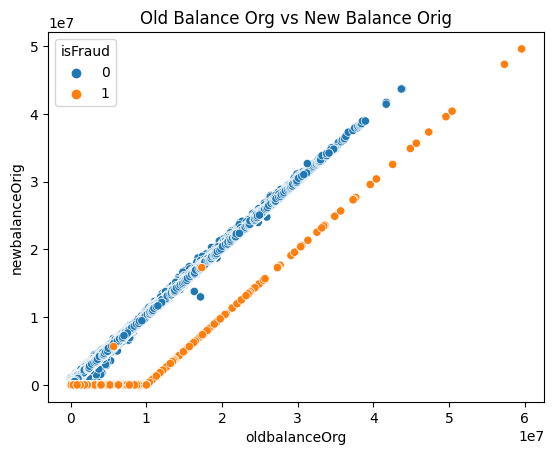

In [11]:
#Visualizing the relationship between 'oldbalanceOrg' and 'newbalanceOrig'

sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=df)
plt.title('Old Balance Org vs New Balance Orig')
plt.show()

**Here are the findings:**

* **Fraudulent Transactions**: The orange data points, representing fraudulent transactions (isFraud: 1), tend to show a higher new balance compared to the old balance. This suggests that in cases of fraud, the new balance is often inflated.
* **Non-Fraudulent Transactions**: The blue data points, representing non-fraudulent transactions (isFraud: 0), are densely packed along a diagonal line, indicating a direct and proportional relationship between the old and new balances.
* **Correlation**: There is a clear correlation for non-fraudulent transactions, where the new balance closely follows the old balance. However, for fraudulent transactions, this correlation is disrupted, showing a pattern where the new balance can be significantly higher than the old balance.

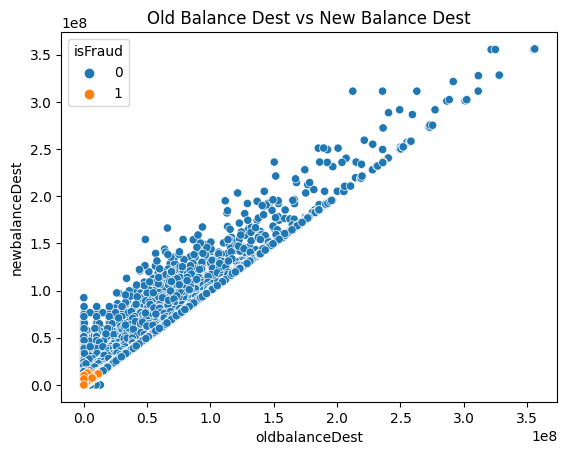

In [12]:
#Visualizing the relationship between 'oldbalanceDest' and 'newbalanceDest'
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=df)
plt.title('Old Balance Dest vs New Balance Dest')
plt.show()

**Here are the key findings:**

* Linear Relationship: For non-fraudulent transactions (blue points), there is a linear relationship between oldbalanceDest and newbalanceDest, suggesting that the new balance increases proportionally with the old balance.
* Fraudulent Transactions: Fraudulent transactions (orange points) are clustered near the origin, indicating that for these transactions, the old balance is low, but the new balance is significantly higher.
* Anomaly Detection: This pattern can be used to detect anomalies and potential fraud, as fraudulent transactions deviate from the expected linear relationship.
* Data Distribution: The majority of transactions are non-fraudulent and follow the expected pattern, while fraudulent transactions are less frequent but show a distinct behavior.

**Dropping unnecessary features based on correlation:**

In [13]:
df.drop(['isFlaggedFraud', 'step'], axis=1, inplace=True)
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

## Data Preprocessing

In [14]:
# Split data feature and data label
X = df.drop('isFraud',axis=1)
y = df['isFraud']
print('X shape is : ' , X.shape, '\n')
print('y shape is : ' , y.shape)

X shape is :  (6362620, 6) 

y shape is :  (6362620,)


In [15]:
# Convert categorical variable(s) into dummy variables
X = pd.get_dummies(X, drop_first=True)

In [16]:
# Split into train, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4453834, 9)
X_test shape is  (1908786, 9)
y_train shape is  (4453834,)
y_test shape is  (1908786,)


In [17]:
# Normalise data
scaler = StandardScaler()

# Transform the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training 

### Logistic Regression

In [18]:
# Train model
Model_LR = LogisticRegression()
Model_LR.fit(X_train_scaled, y_train)

# Evaluate model
Test_Accuracy = Model_LR.score(X_test_scaled, y_test)
print(f'Accuracy Score of Logistic Regression: {Test_Accuracy*100:.2f} %')

Accuracy Score of Logistic Regression: 99.92 %


### Naive Bayes

In [19]:
# Train model
Model_NB = GaussianNB()
Model_NB.fit(X_train_scaled, y_train)

# Evaluate model
Test_Accuracy = Model_NB.score(X_test_scaled, y_test)
print(f'Accuracy Score of Naive Bayes: {Test_Accuracy*100:.2f} %')

Accuracy Score of Naive Bayes: 35.89 %


### Decision Tree

In [20]:
# Train model
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train_scaled, y_train)

# Evaluate model
Test_Accuracy = Model_DT.score(X_test_scaled, y_test)
print(f'Accuracy Score of Decision Tree: {Test_Accuracy*100:.2f} %')

Accuracy Score of Decision Tree: 99.97 %
